In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 09 

In today's lecture, we will:
1. review functions and applying functions to tables by building a simple but sophisticated prediction function. 
2. we will introduce the group operation.


## Prediction

Can we predict how tall a child will grow based on the height of their parents?

To do this we will use the famous [Galton's height dataset](https://galton.org/essays/1880-1889/galton-1886-jaigi-regression-stature.pdf) that was collected to demonstrate the connection between parent's heights and the height of their children. 

In [2]:
families = Table.read_table('data/family_heights.csv')
families

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female
2,75.5,66.5,73.5,4,1,male
2,75.5,66.5,72.5,4,2,male
2,75.5,66.5,65.5,4,3,female
2,75.5,66.5,65.5,4,4,female
3,75,64,71,2,1,male
3,75,64,68,2,2,female


**Discussion:** This data was collected for Europeans living in the late 1800s.  What are some of the potential issues with this data? If we want to answer this question: Can we predict how tall a child will grow based on the height of their parents?

In [ ]:
# doesn't count for grandparents, other ancestors
# old data, back in 1800s --> heights may not exactly be the same, due to a number of factors (diet, nutrition, etc...)
#

### Exploring the Data

**Exercise:** Add a column `"parent average"` containing the average height of both parents.

In [8]:
# family 1:
(78.5 + 67)/2
#family 2:
(75.5 + 66.5)/2
# family 3
(75 +	64	)/2

69.5

In [10]:
parent_average = (families.column('father') + families.column('mother'))/2
families = families.with_column('parent average', parent_average)
families

family,father,mother,child,children,order,sex,parent average
1,78.5,67,73.2,4,1,male,72.75
1,78.5,67,69.2,4,2,female,72.75
1,78.5,67,69,4,3,female,72.75
1,78.5,67,69,4,4,female,72.75
2,75.5,66.5,73.5,4,1,male,71
2,75.5,66.5,72.5,4,2,male,71
2,75.5,66.5,65.5,4,3,female,71
2,75.5,66.5,65.5,4,4,female,71
3,75,64,71,2,1,male,69.5
3,75,64,68,2,2,female,69.5


<details> <summary>Click for Solution</summary>

```python
families = families.with_column(
    "parent average", (families.column('father') + families.column('mother'))/2.0
)
families
```
</details>

What is the relationship between a child's height and the average parent's height? 

**Exercise:** Make a scatter plot showing the relationship between the `"parent average"` and the `"child"` height.

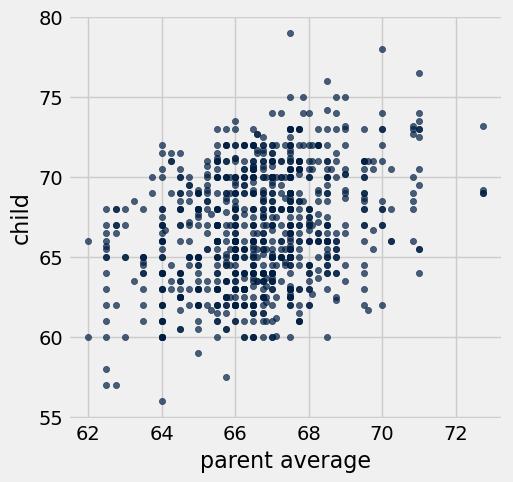

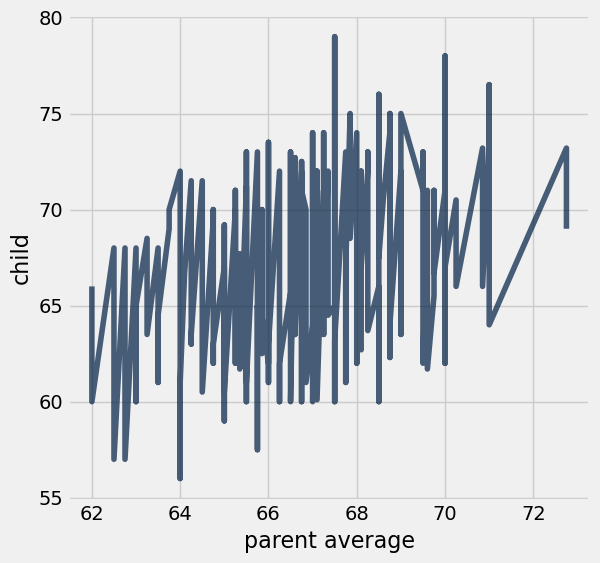

In [13]:
families.scatter('parent average', 'child')
#families.plot('parent average', 'child')

<details> <summary>Click for Solution</summary> <br><br>
    
```python

families.scatter("parent average", "child")

```
    
<br><br></details>

**Questions:**
1. Do we observe a relationship between child and parent height?
2. Would a line plot help reveal that relationship? 
3. Could we learn something from a histogram?

In [ ]:
# 1. we see a weaker but positive correlation between child and average parent height
# 2. line plot is more confusing, but remember a line plot better demonstrates a relationship where a function can be defined
# think x-axis as time, distance, some sequential data (where each x-value is associated with a unique y-value)
# 3. from a histogram, we could see a distribution of average parent heights AND child heights

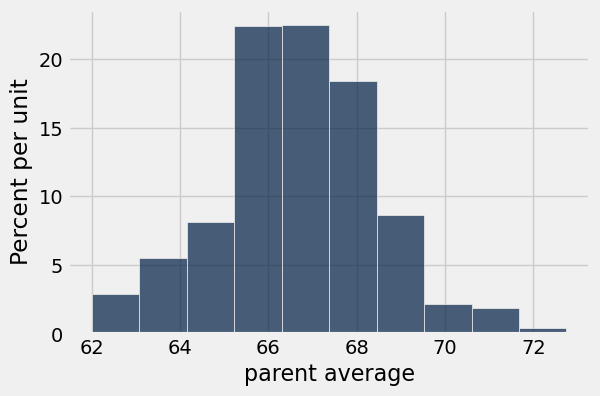

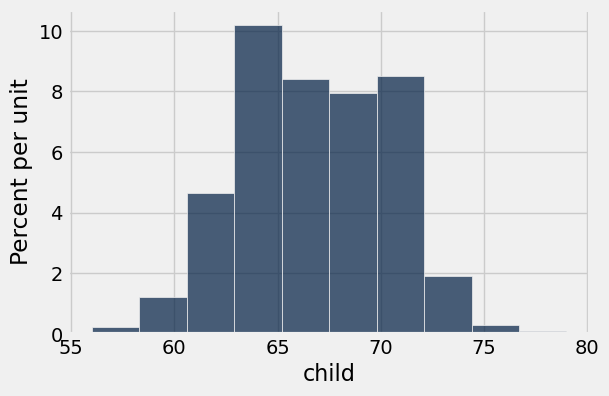

In [15]:
families.hist('parent average')
families.hist('child')

### Making a Prediction

If we wanted to predict the height of a child given the height of the parents, we could look at the heigh of children with parents who have a similar average height. 


In [17]:
my_height = 5*12 + 3 # 5 ft 3 inches
spouse_height = 6*12  # 6 ft 0 inches
my_height, spouse_height

(63, 72)

In [18]:
our_average = (my_height + spouse_height) / 2.0
our_average

67.5

Let's look at parents that are within 1 inch of our height.

In [19]:
window = 1 # 1 inch 
lower_bound = our_average - window # 67.5 - 1 = 66.5 inches
upper_bound = our_average + window # 67.5 + 1 = 68.5 inches

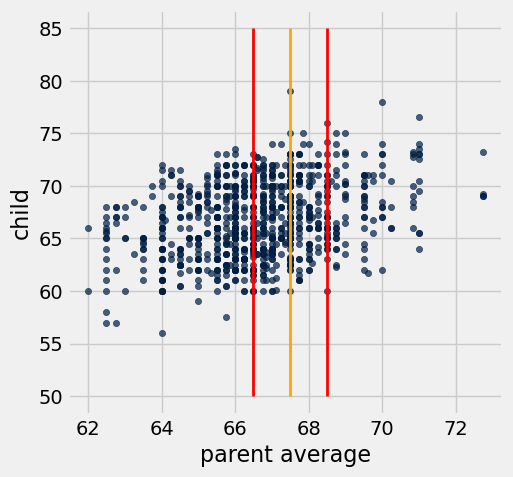

In [20]:
families.scatter('parent average', 'child')
# You don't need to know the details of this plotting code yet.
plots.plot([lower_bound, lower_bound], [50, 85], color='red', lw=2) # red line - window
plots.plot([our_average, our_average], [50, 85], color='orange', lw=2); # orange point -> parent average height
plots.plot([upper_bound, upper_bound], [50, 85], color='red', lw=2); # red line - window

**Exercise:** Create a function that takes an average of the parents heights and returns *an __array__ of all the children's heights* that are within the window of the parent's average height.

In [24]:
families_within_window = families.where('parent average', are.between_or_equal_to(lower_bound, upper_bound))
np.average(families_within_window.column('child'))

67.182286995515696

In [54]:
def similar_child_heights(parent_average): # for example, parent_average = 67.5
    '''
    similar_child_heights(parent average) takes in as an argument (input) the average parent height in inches
    we find a window plus and minus 1 inch away from average parent height in our families table
    and then from this sub-table, we take the child height column
    and take the average of this column
    this becomes our prediction for the child or children's height in adulthood based on the parent average given
    what our function returns is a single average child's height
    '''
    lower_bound = parent_average - window # 67.5 - 1 = 66.5 inches
    upper_bound = parent_average + window # 67.5 + 1 = 68.5 inches
    families_within_window = families.where('parent average', are.between_or_equal_to(lower_bound, upper_bound))
    #avg_child_height = np.average(families_within_window.column('child'))
    child_height_column = families_within_window.column('child')
    return child_height_column

<details> <summary>Click for Solution</summary> <br><br>   

```python
def similar_child_heights(parent_average):
    lower_bound = parent_average - window
    upper_bound = parent_average + window
    return (
        families
            .where("parent average", are.between(lower_bound, upper_bound))
            .column("child")
    )
```

<br><br></details>

Testing the function:

In [45]:
# window = 1.0
similar_child_heights(our_average)

array([ 72. ,  69. ,  68. ,  66.5,  62.5,  62.5,  74. ,  70. ,  68. ,
        67. ,  67. ,  66. ,  63.5,  63. ,  65. ,  66. ,  64.5,  64. ,
        62.7,  74.2,  70.5,  69.5,  66. ,  65.5,  65. ,  65. ,  66. ,
        63. ,  70.5,  70.5,  69. ,  65. ,  63. ,  69. ,  67. ,  63. ,
        73. ,  67. ,  70.5,  70. ,  66.5,  63. ,  67.5,  67.2,  66.7,
        64. ,  71. ,  70. ,  70. ,  66. ,  65. ,  65. ,  74. ,  72. ,
        69. ,  67.5,  63.5,  72. ,  71.5,  71.5,  70. ,  68. ,  65.7,
        70. ,  67. ,  67. ,  66.5,  70. ,  69. ,  68.5,  66. ,  64.5,
        63. ,  71. ,  67. ,  76. ,  72. ,  71. ,  66. ,  66. ,  72. ,
        72. ,  71. ,  69. ,  66. ,  65. ,  73. ,  65.2,  68.5,  67.7,
        68. ,  68. ,  62. ,  68. ,  68. ,  67.5,  66.5,  66.5,  66. ,
        65.5,  65. ,  72. ,  71. ,  70.5,  67. ,  68. ,  68. ,  68. ,
        72. ,  71. ,  70. ,  66. ,  64.5,  64.5,  62. ,  73. ,  62. ,
        67.5,  64.5,  71. ,  67. ,  66. ,  65. ,  63.5,  71. ,  70. ,
        70. ,  64. ,

In [41]:
similar_child_heights(67.5)

67.182286995515696

In [43]:
similar_child_heights(72)

70.526666666666671

**Exercise:** Create a function to predict the child's height as the average of the height of children within the window of the average parent height.

In [46]:
def predict_child_height(parent_average):
    child_height_array = similar_child_heights(parent_average) # this is an array of all children's height within the window of 
    # parent_average
    return np.average(child_height_array) 

<details> <summary>Click for Solution</summary> <br><br>   

```python
def predict_child_height(parent_average):
    return np.average(similar_child_heights(parent_average))
```

<br><br></details>

In [51]:
predict_child_height(our_average)
#predict_child_height(70)
#our_average

67.182286995515696

Let's plot the predicted height as well as the distribution of children's heights:

Mean: 67.1822869955


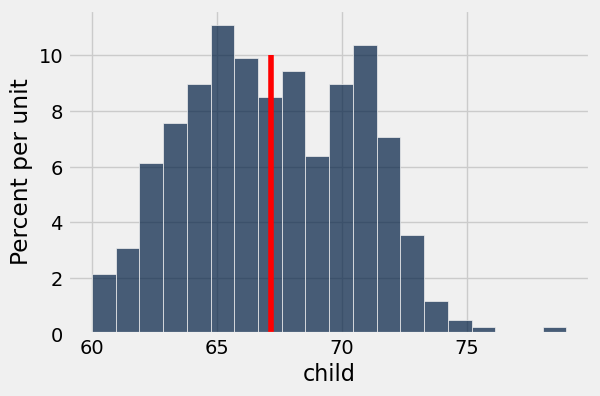

In [49]:
# window = 1.0
similar = similar_child_heights(our_average)
predicted_height = predict_child_height(our_average)

print("Mean:", predicted_height)
Table().with_column("child", similar).hist("child", bins=20)
plots.plot([predicted_height, predicted_height], [0, .1], color="red")

**Discussion:** Is this a good predictor? How would I know? What happens when I change window size?

In [53]:
predicted_child_height_column = families.apply(predict_child_height, 'parent average')
# when i apply predict_child_height to families table, and my input to the function is 'parent average'
# what returns is an array of average/predicted children's height based on that parent average
families.with_column('predicted', predicted_child_height_column)

family,father,mother,child,children,order,sex,parent average,predicted
1,78.5,67,73.2,4,1,male,72.75,70.1
1,78.5,67,69.2,4,2,female,72.75,70.1
1,78.5,67,69,4,3,female,72.75,70.1
1,78.5,67,69,4,4,female,72.75,70.1
2,75.5,66.5,73.5,4,1,male,71,69.9971
2,75.5,66.5,72.5,4,2,male,71,69.9971
2,75.5,66.5,65.5,4,3,female,71,69.9971
2,75.5,66.5,65.5,4,4,female,71,69.9971
3,75,64,71,2,1,male,69.5,68.2092
3,75,64,68,2,2,female,69.5,68.2092


In [58]:
window = 0.5 #inches
families_window = families.with_column(
    'predicted', families.apply(predict_child_height, 'parent average'))
families_window

family,father,mother,child,children,order,sex,parent average,predicted
1,78.5,67,73.2,4,1,male,72.75,70.1
1,78.5,67,69.2,4,2,female,72.75,70.1
1,78.5,67,69,4,3,female,72.75,70.1
1,78.5,67,69,4,4,female,72.75,70.1
2,75.5,66.5,73.5,4,1,male,71,70.4158
2,75.5,66.5,72.5,4,2,male,71,70.4158
2,75.5,66.5,65.5,4,3,female,71,70.4158
2,75.5,66.5,65.5,4,4,female,71,70.4158
3,75,64,71,2,1,male,69.5,68.8769
3,75,64,68,2,2,female,69.5,68.8769


### Evaluating the Predictions

To evaluate the predictions, let's see how the predictions compare to the actual heights of all the children in our dataset.  


**Exercise:** Apply the function (using `apply`) to all the parent averages in the table and save the result to the `"predicted"` column.

<details> <summary>Click for Solution</summary> <br><br>   

```python
# window = 0.5
families = families.with_column(
    "predicted", families.apply(predict_child_height, "parent average"))
families
```

<br><br></details>

**Exercise:** Construct a scatter plot with the `"parent average"` height on the x-axis and the `"child"` height and the `"predicted"` height on the y-axis. 

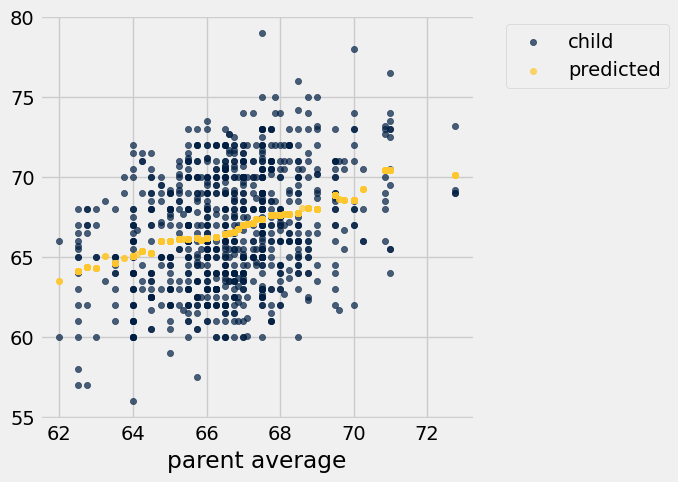

In [59]:
(
    families_window
    .select('parent average','child', 'predicted') # select column that we want
    .scatter('parent average') # specify the x-axis we want to plot in the scatter plot
)

<details> <summary>Click for Solution</summary> <br><br>   

```python
(
    families
    .select('parent average','child', 'predicted')
    .scatter('parent average')
)
```

<br><br></details>

**Discussion:** What do we see in this plot?  What trends.

**Exercise:** Define a function to compute the error (the difference) between the predicted value and the true value and apply that function to the table adding a column containing the `"error"`.  Then construct a histogram of the errors.


In [62]:
def error(predicted, true_value):
    return predicted - true_value

families_window = families_window.with_column("error", families_window.apply(error, "predicted", "child"))
families_window

family,father,mother,child,children,order,sex,parent average,predicted,error
1,78.5,67,73.2,4,1,male,72.75,70.1,-3.1
1,78.5,67,69.2,4,2,female,72.75,70.1,0.9
1,78.5,67,69,4,3,female,72.75,70.1,1.1
1,78.5,67,69,4,4,female,72.75,70.1,1.1
2,75.5,66.5,73.5,4,1,male,71,70.4158,-3.08421
2,75.5,66.5,72.5,4,2,male,71,70.4158,-2.08421
2,75.5,66.5,65.5,4,3,female,71,70.4158,4.91579
2,75.5,66.5,65.5,4,4,female,71,70.4158,4.91579
3,75,64,71,2,1,male,69.5,68.8769,-2.12308
3,75,64,68,2,2,female,69.5,68.8769,0.876923


<details> <summary>Click for Solution</summary> <br><br>   

```python
def error(predicted, true_value):
    return predicted - true_value

families = families.with_column(
    "error", families.apply(error, "predicted", "child"))
families
```

<br><br></details>

Visualizing the distribution of the errors:

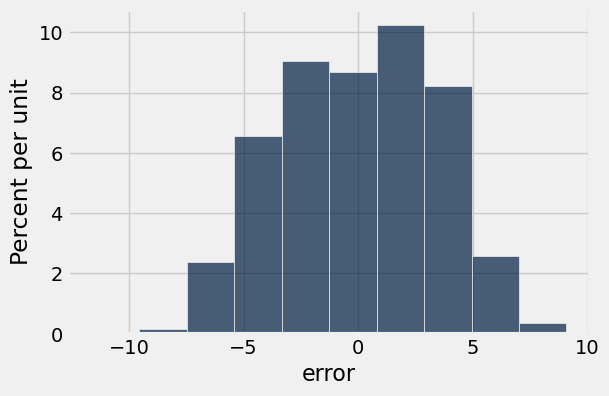

In [64]:
families_window.hist('error')

**Discussion:** Is this good?

### Split by female and male

**Exercise:** Overlay the histograms of the error for male and female children.

Hint: use the keyword argument `group` in hist()

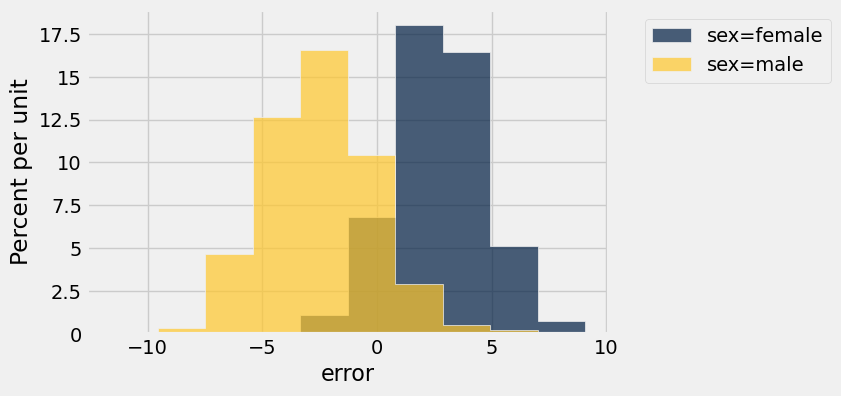

In [67]:
families_window.hist('error', group = 'sex')

<details> <summary>Click for Solution</summary> <br><br>   

```python
families.hist('error', group='sex')
```

<br><br></details>

**Discussion:** What do we observe?

### Building a Better Predictor

Based on what we observed, let's build a better predictor. 

**Exercise:** Implement a new height prediction function that considers averages the  height of children with the same sex and whose parents had a similar height.

*Hint:* Here is the previous function:
```python
def similar_child_heights(parent_average):
    lower_bound = parent_average - window
    upper_bound = parent_average + window
    return np.average(
        families
            .where("parent average", are.between(lower_bound, upper_bound))
            .column("child")
    )
```

In [70]:
def predict_child_height_with_sex(parent_average, sex):
    lower_bound = parent_average - window
    upper_bound = parent_average + window
    return np.average(
        families_window
            .where('sex', sex)
            .where('parent average', are.between(lower_bound, upper_bound))
            .column('child')
                  )

<details> <summary>Click for Solution</summary> <br><br>   

```python
def predict_child_height_with_sex(parent_average, sex):
    lower_bound = parent_average - window
    upper_bound = parent_average + window
    return np.average(
        families
        .where("sex", sex)
        .where("parent average", are.between(lower_bound, upper_bound))
        .column("child")
    )
```

<br><br></details>

Let's test it out.

In [71]:
predict_child_height_with_sex(our_average, "male")
# found within a window of parent average height,
# all the MALE children's height
# and then took the average as our prediction

69.796774193548387

In [72]:
predict_child_height_with_sex(our_average, "female")
# found within a window of parent average height,
# all the FEMALE children's height
# and then took the average as our prediction

64.677884615384613

**Exercise:** Apply the better predictor to the table and save the predictions in a column called `"predicted with sex"`.

In [ ]:
predicted_with_sex = families.apply(predict_child_height_with_sex, "parent average", "sex")
families = families.with_column("predicted with sex", predicted_with_sex)
families

<details> <summary>Click for Solution</summary> <br><br>   

```python
families = families.with_column(
    "predicted with sex", families.apply(predict_child_height_with_sex, "parent average", "sex"))
families
```

<br><br></details>

**Exercise:** Construct a histogram of the new errors broken down by the sex of the child.

In [ ]:
error_with_sex = families.apply(error, "predicted with sex", "child")
families = families.with_column("error with sex",  error_with_sex)

families.hist("error with sex", group="sex")

As a point of comparison

In [ ]:
families.hist("error", group="sex")

---
<center> Return to slides <center>

---

## Grouping

For this part of the notebook we will use the following toy data:

In [ ]:
cones = Table.read_table('data/cones.csv')
cones

**Exercise:** Use the `group` function to determine the number of cones with each flavor.

<details> <summary>Click for Solution</summary> <br><br>   

```python
cones.group('Flavor')
```

<br><br></details>

**Exercise:** Use the `group` function to compute the average price of cones for each flavor.

<details> <summary>Click for Solution</summary> <br><br>   

```python
cones.group('Flavor', np.average)
 ```

<br><br></details>

**Exercise:** Use the `group` function to compute min price of cones for each flavor.

**Question**:
Why does color have a min?

<details> <summary>Click for Solution</summary> <br><br>   

```python
cones.group('Flavor', np.min)
```

<br><br></details>

What is really going on:

In [ ]:
cones

In [ ]:
def my_grp(grp):
    print(grp)
    return grp

cones.group("Flavor", my_grp)